<a href="https://colab.research.google.com/github/wolf9999/Lab10/blob/main/LabPersonalApplications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== RAW DATA PREVIEW ===


,season,route_id,route_name,train,direction_id,day_type_id,day_type_name,stop_time,stop_id,stopsequence,average_ons,average_offs,average_load,ObjectId
0,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:45:00,Readville,1.0,2,0,2,1
1,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:48:00,Fairmount,2.0,16,0,18,2
2,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:51:00,Blue Hill Avenue,3.0,16,0,34,3
3,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:53:00,Morton Street,4.0,12,0,46,4
4,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:56:00,Talbot Avenue,5.0,12,0,58,5



=== RAW COLUMN NAMES ===
['season', 'route_id', 'route_name', 'train', 'direction_id', 'day_type_id', 'day_type_name', 'stop_time', 'stop_id', 'stopsequence', 'average_ons', 'average_offs', 'average_load', 'ObjectId']


,season,route_id,route_name,train,direction_id,day_type_id,day_type_name,stop_time,stop_id,stopsequence,average_ons,average_offs,average_load
0,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:45:00,Readville,1.0,2,0,2
1,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:48:00,Fairmount,2.0,16,0,18
2,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:51:00,Blue Hill Avenue,3.0,16,0,34
3,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:53:00,Morton Street,4.0,12,0,46
4,Fall 2024,CR-Fairmount,Fairmount Line,900,1,day_type_01,weekday,04:56:00,Talbot Avenue,5.0,12,0,58


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15761 entries, 0 to 15760
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         15761 non-null  object 
 1   route_id       15761 non-null  object 
 2   route_name     15761 non-null  object 
 3   train          15761 non-null  object 
 4   direction_id   15761 non-null  int64  
 5   day_type_id    15761 non-null  object 
 6   day_type_name  15761 non-null  object 
 7   stop_time      15761 non-null  object 
 8   stop_id        15761 non-null  object 
 9   stopsequence   15760 non-null  float64
 10  average_ons    15761 non-null  int64  
 11  average_offs   15761 non-null  int64  
 12  average_load   15761 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.6+ MB
None

Unique values:
season: 3 unique values
route_id: 12 unique values
route_name: 14 unique values
train: 745 unique values
direction_id: 2 unique values
day_type_id: 

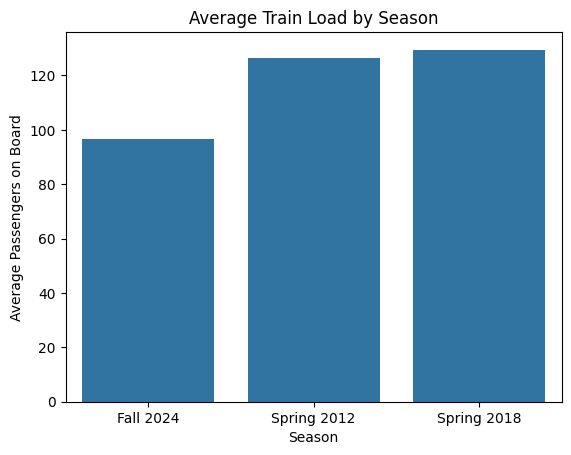

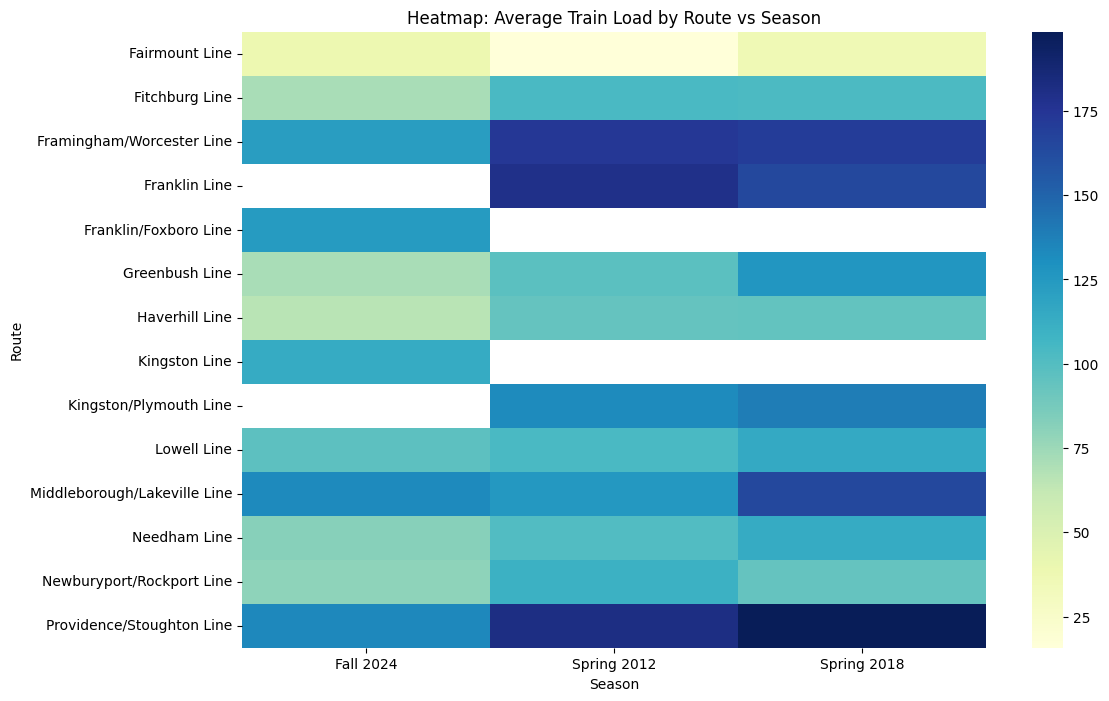

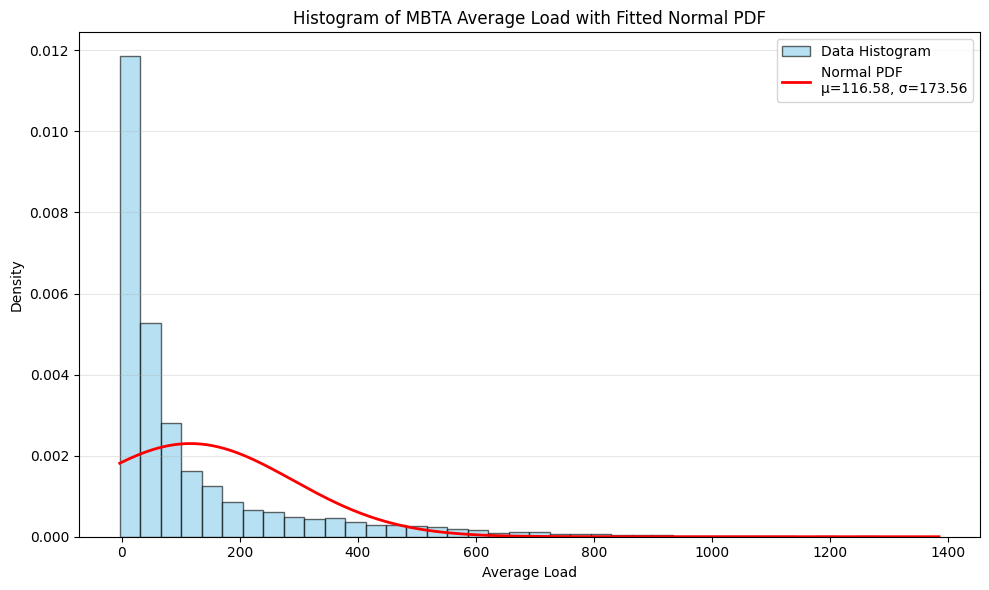

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


file_path = "/content/MBTA_Commuter_Rail_Ridership_by_Trip%2C_Season%2C_Route_Line%2C_and_Stop..csv"
df = pd.read_csv(file_path)

print("=== RAW DATA PREVIEW ===")
display(df.head())

print("\n=== RAW COLUMN NAMES ===")
print(df.columns.tolist())

df.columns = df.columns.str.strip().str.lower()

if "objectid" in df.columns:
    df.drop(columns=["objectid"], inplace=True)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()


display(df.head())
print(df.info())

print("\nUnique values:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

if "season" in df.columns:
    season_load = df.groupby("season")["average_load"].mean().sort_values()
    print("\n=== Average Load by Season ===")
    print(season_load)

    plt.figure()
    sns.barplot(x=season_load.index, y=season_load.values)
    plt.title("Average Train Load by Season")
    plt.ylabel("Average Passengers on Board")
    plt.xlabel("Season")
    plt.show()

if {"route_name", "season", "average_load"}.issubset(df.columns):
    pivot = df.pivot_table(index="route_name", columns="season", values="average_load", aggfunc="mean")
    plt.figure(figsize=(12,8))
    sns.heatmap(pivot, cmap="YlGnBu", annot=False)
    plt.title("Heatmap: Average Train Load by Route vs Season")
    plt.xlabel("Season")
    plt.ylabel("Route")


import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

avg_load = df["average_load"].dropna().values
mu, sigma = st.norm.fit(avg_load)
x = np.linspace(avg_load.min(), avg_load.max(), 300)
pdf_vals = st.norm.pdf(x, mu, sigma)
plt.figure(figsize=(10,6))
plt.hist(avg_load, bins=40, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")
plt.plot(x, pdf_vals, 'r-', lw=2, label=f"Normal PDF\nμ={mu:.2f}, σ={sigma:.2f}")

plt.title("Histogram of MBTA Average Load with Fitted Normal PDF")
plt.xlabel("Average Load")
plt.ylabel("Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


#Takeaways: The season affects the average train load drastically. For example, in fall 2024, the providence/stoughton line had less of a load than it did in spring of 2018. The load of passengers with the higest frequency is 0.